<a href="https://colab.research.google.com/github/eilinlunam/Fisicoquimica-Computacional/blob/master/quantum_dots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejecutar siguiente celda.

In [0]:
import os
import numpy as np
from math import sqrt
from matplotlib import pylab
from google.colab import files
import matplotlib.pyplot as plt
from google.colab import widgets

class punto_cuantico():
    def __init__(self, forma, n, d=0.0, ang=0.0, addH=False, atomos=None, 
                 coords=None, N=None, x=None, y=None, z=None, 
                 coordsC=None, nC=None, Cx=None, Cy=None, Cz=None,
                 coordsH = None, nH=None, Hx=None, Hy=None, Hz=None,                   
                 acc=1.44, CH=1.41,
                 calcular_parametros=True):
        self.n = n             # Tamano punto cuantico.
        self.form = forma      # Forma geometrica.
        self.acc = acc         # Distancia C-C
        self.CH = CH           # Distancia C-H.
        self.addH = addH       # Booleano que agrega coordenadas de Hidrogenos
        self.d = d             # Valor en eje Z
        self.ang = ang         # Angulo de rotacion
        self.atomos = atomos   # Vector de atomos: 1='C', 0='H'
        self.coords = coords   # Matriz de Coordenadas [[x],[y],[z]]
        self.coordsC = coordsC # Matriz de Coordenadas de Carbonos
        self.coordsH = coordsH # Matriz de Coordenadas de Hidrogenos
        self.N = N             # Cantidad total de atomos.
        self.nC = nC           # Cantidad de Carbonos
        self.nH = nH           # Cantidad de Hidrogenos
        self.x, self.y, self.z = x, y, z       # Coords x,y,z.
        self.Cx, self.Cy, self.Cz = Cx, Cy, Cz # Coords x,y,z de C.
        self.Hx, self.Hy, self.Hz = Hx, Hy, Hz # Coords x,y,z de H.
        if calcular_parametros:
          if self.form == "Triangular":
            self.Triangular()
          elif self.form == "Hexagonal":
            self.Hexagonal()
          elif self.form == "Cuadrado":
            self.Cuadrado(self.n)

    def __add__(self, other):
        if type(self.ang)==float:
            ang=[self.ang]+[other.ang] 
            d = [self.d]+[other.d]
        else:
            ang=self.ang+[other.ang] 
            d = self.d+[other.d]
        atomos = self.atomos + other.atomos
        #Total
        x1, y1, z1 = self.coords
        x2, y2, z2 = other.coords
        N = self.N + other.N
        coords = [x1+x2, y1+y2, z1+z2]
        x, y, z = coords        
        #Carbonos
        Cx1, Cy1, Cz1 = self.coordsC
        Cx2, Cy2, Cz2 = other.coordsC
        nC = self.nC + other.nC
        coordsC = [Cx1+Cx2, Cy1+Cy2, Cz1+Cz2]
        Cx,Cy,Cz = coordsC
        #Hydrogens
        if self.addH:
            Hx1, Hy1, Hz1 = self.coordsH
            Hx2, Hy2, Hz2 = other.coordsH
            nH = self.nH + other.nH 
            coordsH = [Hx1+Hx2, Hy1+Hy2, Hz1+Hz2] 
            [Hx,Hy,Hz] = coordsH 
        else:
            Hx1, Hy1, Hz1 = None, None, None
            Hx2, Hy2, Hz2 = None, None, None
            nH = None
            coordsH = None, None, None
            [Hx,Hy,Hz] = None, None, None

        return punto_cuantico(self.form, self.n, d=d, ang=ang, addH=self.addH, 
                              atomos=atomos, 
                              coords=coords, N=N, x=x, y=y, z=z, 
                              coordsC=coordsC, nC=nC, Cx=Cx, Cy=Cy, Cz=Cz,
                              coordsH=coordsH, nH=nH, Hx=Hx, Hy=Hy, Hz=Hz,
                              calcular_parametros=False)

    
    #--------------------------------------------------------------------------#
    #------------------------------- CARBONOS ---------------------------------#
    #--------------------------------------------------------------------------#
    def llenado(self, n, I):
        for k in range(n):
            i = I[k]
            j = self.t-1.5*k*self.acc
            X = np.linspace(-i*sqrt(3)*self.acc/2, i*sqrt(3)*self.acc/2, i+1)
            Y = np.ones(i+1)*j
            self.x += list(X)*2
            self.y += list(Y)+list(Y-self.acc)
 
    # Generando coordenadas de un punto cuantico triangular de tamano n.
    def Triangular(self): 
        self.t = (0.75*self.n-0.25)*self.acc 
        self.x, self.y  = [0], [self.t+0.5*self.acc]
        self.llenado(self.n, np.arange(1,self.n+1))
        self.x += list(np.linspace((-self.n+1)*sqrt(3)*self.acc/2, 
                                    (self.n-1)*sqrt(3)*self.acc/2, self.n))
        self.y += list(np.ones(self.n)*(self.t-1.5*self.n*self.acc))
        return self.ParametrosC()
 
    # Generando las coordenadas de un punto cuantico hexagonal de tamano n.
    def Hexagonal(self):
        self.t = (1.5*self.n-1)*self.acc
        self.x, self.y = [], []
        I = np.append(np.arange(self.n, self.n*2-1),
                      np.arange(self.n*2-1,self.n-1,-1))
        self.llenado(self.n*2-1, I)
        self.x +=  list(np.linspace(-(self.n-1)*sqrt(3)*self.acc/2, 
                                     (self.n-1)*sqrt(3)*self.acc/2, self.n))*2
        self.y += (list(np.ones(self.n)*max(self.y)+0.5*self.acc)+
                   list(np.ones(self.n)*min(self.y)-0.5*self.acc))
        return self.ParametrosC()
      
    # Generando las coordenadas de un punto cuantico cuadrado de tamano n.
    def Cuadrado(self, n, square=False):
        self.t = (0.75*n-0.25)*self.acc 
        self.x = list(np.linspace(-(n-1)*sqrt(3)*self.acc/2, 
                                   (n-1)*sqrt(3)*self.acc/2, n))
        self.y = list(np.ones(n)*self.t+0.5*self.acc)
        I = [n, n-1]*(n//2+3)
        self.llenado(n, I)        
        nn = n-1 if n%2==0 else n
        self.x += list(np.linspace((-I[n-1]+1)*sqrt(3)*self.acc/2, 
                                      (nn-1)*sqrt(3)*self.acc/2, nn))
        self.y += list(np.ones(nn)*min(self.y)-0.5*self.acc)
        if square: return self
        return self.ParametrosC()

    # Guardando informacion de los Carbonos.
    def ParametrosC(self):
        self.z = list(np.ones(len(self.x))*self.d)
        self.atomos = list(np.ones(len(self.x)))
        self.nC = len(self.x)
        if self.ang != 0.:
            self.x, self.y = self.rotacion(self.x,self.y)
        self.coordsC = [self.x,self.y,self.z]
        self.Cx, self.Cy, self.Cz = self.x.copy(),self.y.copy(),self.z.copy()
        if self.addH == True:
            if self.form=="Triangular":
                return self.addHidrogenosTri()
            elif self.form=="Hexagonal":
                return self.addHidrogenosHex()
            else:
                return self.addHidrogenosCua()
        self.N = self.nC
        self.coords = [self.x,self.y,self.z]
        return self
    
    #--------------------------------------------------------------------------#
    #---------------------------- HIDROGENOS ----------------------------------#
    #--------------------------------------------------------------------------#
    def llenadoH(self, n, I):
        for k in range(n):
            i = I[k]
            j = self.t-1.5*k*self.acc
            self.Hx += [-i*sqrt(3)*self.acc/2 - sqrt(3)*self.CH/2, 
                         i*sqrt(3)*self.acc/2 + sqrt(3)*self.CH/2]
            self.Hy += [j+self.CH/2]*2
            
    # Agregando hidrogenos a puntos cuanticos triangulares.
    def addHidrogenosTri(self):
        self.Hx, self.Hy  = [0], [self.t+self.acc/2+self.CH]
        self.llenadoH(self.n, np.arange(1,self.n+1))
        self.Hx += (list(np.linspace(-(self.n-1)*sqrt(3)*self.acc/2,
                                      (self.n-1)*sqrt(3)*self.acc/2, self.n))
                    +[self.Hx[self.n*2]] 
                    +[self.Hx[self.n*2-1]])
        self.Hy += (list(np.ones(self.n)*(self.t-1.5*self.n*self.acc)-self.CH)
                    +[self.Hy[self.n*2]-self.acc-self.CH] 
                    +[self.Hy[self.n*2]-self.acc-self.CH])
        return self.ParametrosH()
      
    # Agregando hidrogenos a puntos cuanticos hexagonales.
    def addHidrogenosHex(self):
        self.Hx, self.Hy = [], []
        self.llenadoH(self.n, np.arange(self.n,self.n*2))
        self.Hx += list(np.linspace(-(self.n-1)*sqrt(3)*self.acc/2,
                                     (self.n-1)*sqrt(3)*self.acc/2, self.n))
        self.Hy += list(np.ones(self.n)*self.t+self.acc/2+self.CH)
        self.Hx += self.Hx
        self.Hy += list(-np.array(self.Hy))
        return self.ParametrosH()
      
    # Agregando hidrogenos a puntos cuanticos cuadrados.
    def addHidrogenosCua(self):
        self.Hx = list(np.linspace(-(self.n-1)*sqrt(3)*self.acc/2, 
                                    (self.n-1)*sqrt(3)*self.acc/2, self.n))
        self.Hy = list(np.ones(self.n)*self.t+0.5*self.acc+self.CH) 
        #..................................................................
        I = [self.n,self.n-1]*(self.n//2+3)
        for k in range(0, self.n, 2):
            self.Hx += ([-I[k]*sqrt(3)*self.acc/2 - sqrt(3)*self.CH/2]*2+
                        [ I[k]*sqrt(3)*self.acc/2 + sqrt(3)*self.CH/2]*2)
            self.Hy += [(self.t + k*-1.5*self.acc)+self.CH/2, 
                        (self.t + k*-1.5*self.acc)-self.acc-self.CH/2]*2
        #..................................................................
        n = self.n-1 if self.n%2==0 else self.n
        self.Hx += list(np.linspace((-I[self.n-1]+1)*sqrt(3)*self.acc/2, 
                                      (n-1)*sqrt(3)*self.acc/2, n))
        self.Hy += list(np.ones(n)*self.t-1.5*self.n*self.acc-self.CH)
        if self.n%2==0:
          self.Hx += [-(self.n-1)*sqrt(3)*self.acc/2 - sqrt(3)*self.CH/2,
                       (self.n-1)*sqrt(3)*self.acc/2 + sqrt(3)*self.CH/2]
          self.Hy += [self.t-1.5*(self.n-1)*self.acc-self.acc-self.CH/2]*2
        return self.ParametrosH()
               
    # Guardando informacion de los Hidrogenos
    def ParametrosH(self):
        self.Hz = list(np.ones(len(self.Hx))*self.d)
        if self.ang!=0.:
            self.Hx, self.Hy = self.rotacion(self.Hx,self.Hy)
        self.atomos += list(np.zeros(len(self.Hx)))
        self.x += self.Hx
        self.y += self.Hy
        self.z += self.Hz
        self.coords = [self.x, self.y, self.z]
        self.coordsH = [self.Hx,self.Hy,self.Hz]
        self.nH = len(self.Hx)
        self.Hx, self.Hy
        self.N = self.nC+self.nH
        return self

    #--------------------------------------------------------------------------#
    #----------------------------- FUNCIONES ----------------------------------#
    #--------------------------------------------------------------------------#
    # Rotando coordenadas x y y alrededor del punto(0,0)
    def rotacion(self, x,y):
        A = [[np.cos(self.ang), -np.sin(self.ang)],
             [np.sin(self.ang), np.cos(self.ang)]]
        r = [x,y]
        x, y = np.dot(A,r)
        return list(x), list(y)
    
    # Graficando punto cuantico
    def graph(self, cC='r', cH='y'):
        pylab.plot(self.Cx,self.Cy,'.', color=cC)
        if self.addH==True:
            pylab.plot(self.Hx,self.Hy,'y.', color=cH)
        
    # Escribiendo coordenadas
    def write_coords(self, filename):
      f = open(filename, "w")
      f.write(str(self.N)+"\n")
      f.write("XYZ"+"\n")
      for i in range(self.N):
          if self.atomos[i]==1: a="C"
          else: a="H"
          f.write( a+"\t"
                    +str(self.x[i])+"\t"
                    +str(self.y[i])+"\t"
                    +str(self.z[i])+"\n")
      f.close()
      return 

# <font color='red'> QUANTUM DOTS </font> 

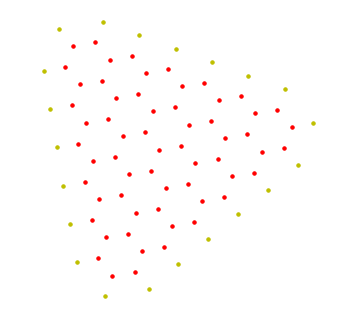

In [0]:
#@title ##  <font color='blue'> Generating a quantum dot. </font> { run: "auto", vertical-output: true, form-width: "60%" }

Form = "Triangular" #@param ["Triangular", "Hexagonal", "Cuadrado"]
n_points = 6 #@param {type:"slider", min:1, max:50, step:1}
add_Hydrogens = True #@param ["False", "True"] {type:"raw"}
angle = 185 #@param {type:"slider", min:0, max:360, step:5}
coord_z = 0 #@param {type:"slider", min:0, max:100, step:1}
#@markdown ---
#@markdown  <font color='blue'> **Options:** </font>
#@markdown ---
Plot = True #@param {type:"boolean"}
show_axis = False #@param {type:"boolean"}
show_title = False #@param {type:"boolean"}
#@markdown ---
Save_file_xyz = False #@param {type:"boolean"}
file_name = "file.xyz" #@param {type:"string"}
#@markdown ---

plt.figure(figsize=(5.5,5), dpi=80)
qd = punto_cuantico(Form, n_points, d=coord_z, 
                    ang=angle, addH=add_Hydrogens)

if Plot:
  qd.graph()
  pylab.axis('equal')
  if show_axis == False:
    pylab.axis('off')
  if show_title:
    pylab.title("n="+str(qd.n))
  
if Save_file_xyz:
  qd.write_coords(file_name)
  files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

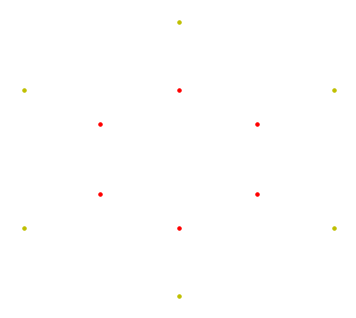

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

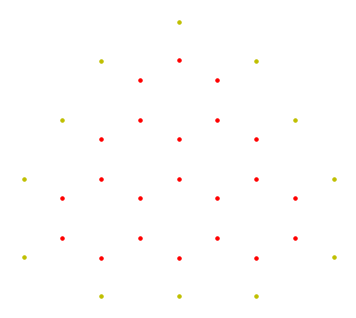

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

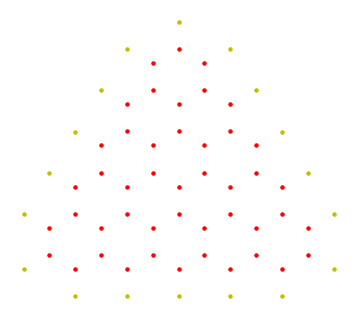

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

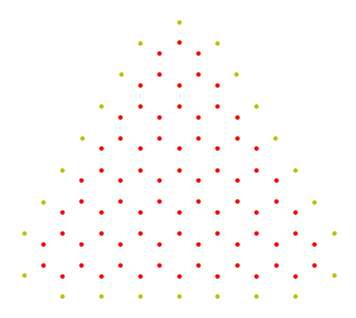

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

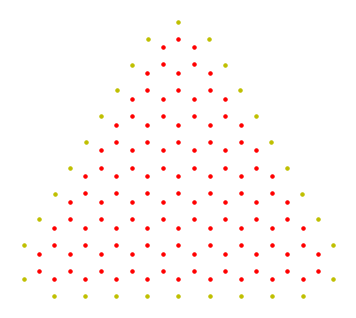

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

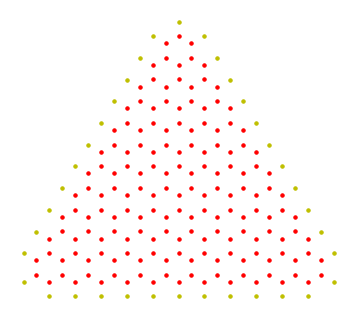

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

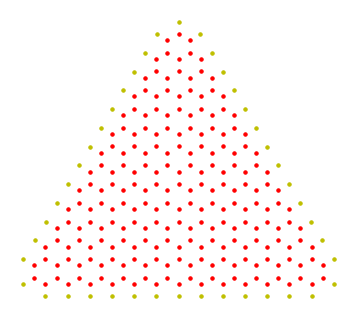

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

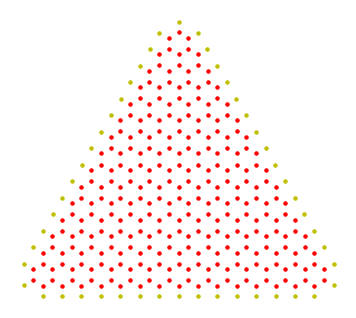

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

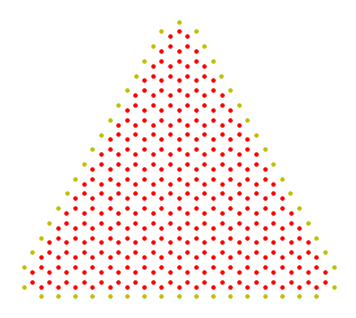

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

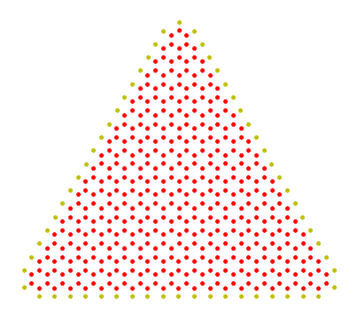

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

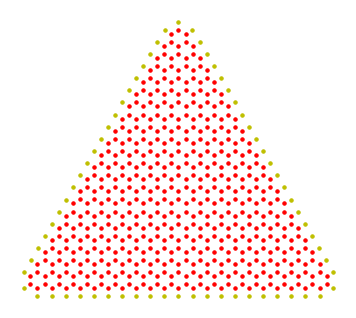

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

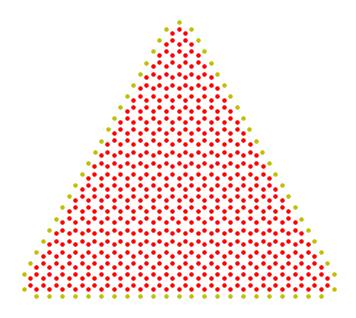

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

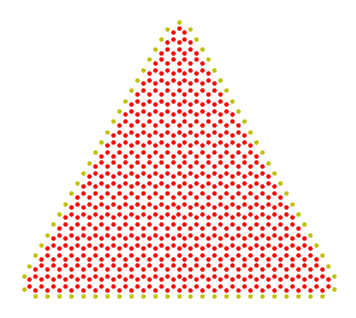

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

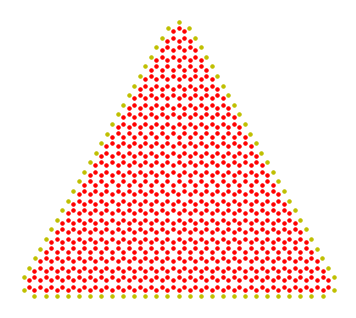

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

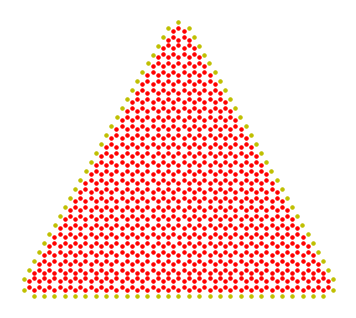

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

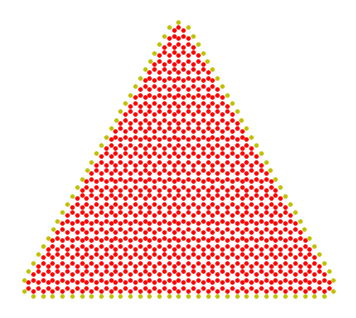

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

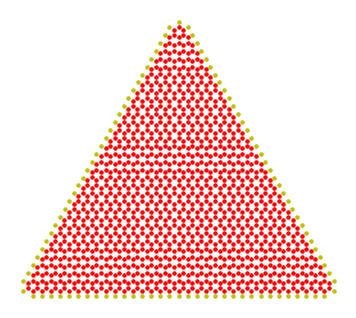

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

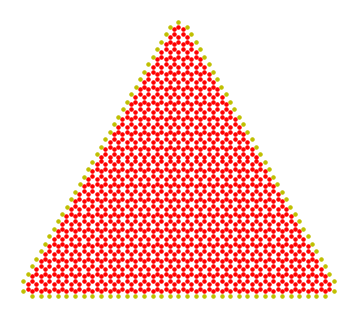

<IPython.core.display.Javascript object>

In [0]:
# @title ## <font color='blue'> Generating several quantum dots</font> {run:"auto"}
Form = "Triangular" #@param ["Triangular", "Hexagonal", "Cuadrado"]
n_initial = 1 #@param {type:"integer"}
n_final = 35 #@param {type:"integer"}
step = 2 #@param {type:"integer"}
add_Hydrogens = True #@param ["False", "True"] {type:"raw"}
angle = 0 #@param {type:"slider", min:0, max:360, step:5}
coord_z = 0 #@param {type:"slider", min:0, max:100, step:1}
#@markdown ---
#@markdown <font color='blue'>**Options:**</font> 
#@markdown ---
Plot = True #@param {type:"boolean"}
show_axis = False #@param {type:"boolean"}
show_title = False #@param {type:"boolean"}
#@markdown ---
Save_file_xyz = False #@param {type:"boolean"}
file_names = "file.xyz" #@param {type:"string"}
#@markdown ---

x = range(n_initial, n_final+1, step)

if Plot:
  tb = widgets.TabBar([str(i) for i in x])
  for i in range(len(x)):
    qd = punto_cuantico(Form, x[i], d=coord_z, 
                      ang=angle, addH=add_Hydrogens) 
    with tb.output_to(i, select=(i < 1)):
      pylab.figure(figsize=(5.5,5), dpi=80)
      qd.graph()
      if show_axis == False:
        pylab.axis('off')
      if show_title:
        pylab.title("n="+str(qd.n))
      pylab.show()

if Save_file_xyz:
  if os.path.isdir('coords/'):
    ! rm -rf coords
  if os.path.isfile('coords.zip'):
    ! rm coords.zip
  ! mkdir coords
  r = file_names.split('.')
  for i in range(len(x)):
    qd.write_coords('coords/'+r[0]+'-n'+str(x[i])+'.'+r[1]) 
  !zip -r coords.zip coords/
  files.download('coords.zip')

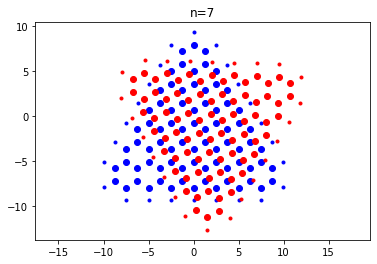

In [0]:
#@title ##  <font color='blue'> Superimposed quantum dots. </font> { run: "auto", vertical-output: true, form-width: "50%" }

Form = "Triangular" #@param ["Triangular", "Hexagonal", "Cuadrado", "Circular"]
n_points = 7 #@param {type:"slider", min:1, max:50, step:1}
add_Hydrogens = True #@param ["False", "True"] {type:"raw"}
angle = "0., 45." #@param {type:"string"}
coord_z = "0., 3." #@param {type:"string"}
#@markdown ---
#@markdown  <font color='blue'> **Options:** </font>
#@markdown ---
Plot = True #@param {type:"boolean"}
show_axis = True #@param {type:"boolean"}
show_title = True #@param {type:"boolean"}
#@markdown ---
Save_file_xyz = False #@param {type:"boolean"}
file_name = "file.xyz" #@param {type:"string"}
#@markdown ---

angles = list(angle.split(','))
angles = np.array([a.strip() for a in angles], dtype=float)

coordsZ = list(coord_z.split(','))
coordsZ = np.array([z.strip() for z in coordsZ], dtype=float)

qd1 = punto_cuantico(Form, n_points,
                     d=coordsZ[0], ang=angles[0],
                     addH=add_Hydrogens)

if Plot:
  plt.figure()
  plt.plot(qd1.Cx, qd1.Cy, 'bo')
  if add_Hydrogens:
      plt.plot(qd1.Hx, qd1.Hy, 'b.')
  plt.axis('equal')
  if show_axis == False:
    plt.axis('off')
  if show_title:
    plt.title("n="+str(n_points))

for i in range(1,len(angles)):
    qd2 = punto_cuantico(Form, n_points, 
                          d=coordsZ[i], ang=angles[i],
                          addH=add_Hydrogens)
    if Plot:
        plt.plot(qd2.Cx, qd2.Cy, 'ro')
        if add_Hydrogens:
            plt.plot(qd2.Hx, qd2.Hy, 'r.')   
          
    qd1 += qd2
 
if Save_file_xyz:
  qd1.write_coords(file_name)
  files.download(file_name)
